In [2]:
from google.colab import files
uploaded = files.upload()

Saving ASCAD.h5 to ASCAD.h5


In [ ]:
!pip install h5py matplotlib numpy scipy scikit-learn tensorflow

In [1]:
SBOX = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5,
    0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0,
    0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa8, 0x51, 0xa3,
    0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6,
    0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2, 0xcd, 0x0c,
    0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7,
    0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73, 0x60, 0x81,
    0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee,
    0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb, 0xe0, 0x32,
    0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3,
    0xac, 0x62, 0x91, 0x95, 0xe4, 0x79, 0xe7, 0xc8,
    0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56,
    0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08, 0xba, 0x78,
    0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd,
    0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a, 0x70, 0x3e,
    0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35,
    0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e, 0xe1, 0xf8,
    0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e,
    0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf, 0x8c, 0xa1,
    0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99,
    0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16, 0x18, 0xe3,
    0x63, 0x20, 0x0c, 0x26, 0x38, 0xb7, 0x56, 0xc7,
    0x2f, 0x1b, 0x29, 0x9a, 0xf5, 0xc3, 0xcc, 0xe5,
    0x39, 0x61, 0xa5, 0xa2, 0x5a, 0x27, 0x84, 0x1c,
    0x51, 0x72, 0x9d, 0x10, 0x3a, 0x0e, 0x0b, 0x74,
    0xa4, 0x28, 0x25, 0x23, 0xb6, 0x7e, 0x39, 0x67,
    0x13, 0x93, 0x36, 0x7b, 0x09, 0xbe, 0x3b, 0x41,
    0x00, 0xb3, 0x20, 0xc9, 0xc0, 0x9f, 0x6e, 0x8d,
    0x4c, 0x5d, 0x4e, 0xf9, 0x2c, 0x3f, 0x6a, 0xb0,
    0xf1, 0xac, 0xb1, 0x83, 0xc3, 0x58, 0x2b, 0xa7,
    0x71, 0x03, 0xfb, 0xe2, 0x9c, 0xca, 0x7f, 0x66
]


def apply_sbox(byte):
  # DBG log - print(f"Applying SBOX to {byte}")
  return SBOX[byte]

def hamming_weight(byte):
  return bin(byte).count('1')

In [2]:
import h5py
import numpy as np

ascad_path = "/content/drive/MyDrive/ASCAD_databases/ASCAD.h5"
f = h5py.File(ascad_path, "r")



In [3]:
trace_subset = 10000

traces = f['Profiling_traces/traces'][:trace_subset]
metadata = f['Profiling_traces/metadata'][:trace_subset]

atck_traces = f['Attack_traces/traces'][:trace_subset]
atck_metadata = f['Attack_traces/metadata'][:trace_subset]

In [4]:
metadata_map = {
    "plaintext" : 0,
    "key" : 2,
    "ciphertext" : 1,
    "masks" : 3,
    "desync" : 4
}

plaintexts = np.array([meta[metadata_map["plaintext"]] for meta in metadata])
keys = np.array([meta[metadata_map["key"]] for meta in metadata])

In [10]:
[apply_sbox(x) for x in metadata[0][metadata_map['key']] ^ metadata[0][metadata_map['plaintext']]]


[94, 41, 157, 99, 122, 30, 111, 123, 126, 1, 255, 54, 137, 57, 205, 31]

In [11]:
metadata[0][metadata_map['plaintext']]

array([  6,  65, 195,  66,  25, 182, 248,  19, 159, 132,  97,   6,  46,
       137,  42,  16], dtype=uint8)

In [12]:
metadata[0][metadata_map['masks']]

array([  7,  84,  71, 171, 129, 171,  90, 193, 236, 131,  21, 112, 185,
        95, 212,  55], dtype=uint8)

In [14]:
metadata[0][-1]

array([0], dtype=uint32)

# Sanity check

Explore if the dataset already has enough correlation if we *know* the key. Not for actual key extraction

In [6]:
target_byte = 3
hypothetical_leakage = []

for pt, key in zip(plaintexts, keys):
  intermediate = apply_sbox(int(pt[target_byte] ^ key[target_byte]))
  leakage = hamming_weight(intermediate)
  hypothetical_leakage.append(leakage)

hypothetical_leakage = np.array(hypothetical_leakage)

In [7]:
from scipy.stats import pearsonr

num_points = traces.shape[1]
correlations = np.zeros(num_points)

for i in range(num_points):
  point_values = traces[:, i]
  correlations[i], _ = pearsonr(point_values, hypothetical_leakage)

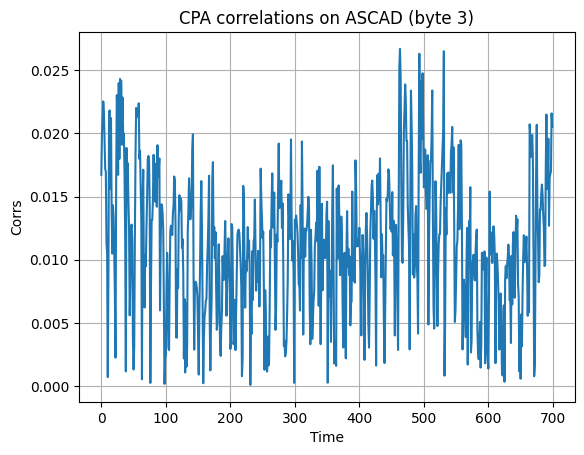

In [8]:
import matplotlib.pyplot as plt

plt.plot(np.abs(correlations))
plt.title(f"CPA correlations on ASCAD (byte {target_byte})")
plt.xlabel("Time")
plt.ylabel("Corrs")
plt.grid(True)
plt.show()

In [9]:
guesses = np.zeros((256, traces.shape[1]))

for key_guess in range(256):
  hypothesis = [hamming_weight(apply_sbox(pt[target_byte] ^ key_guess)) for pt in plaintexts]
  hypothesis = np.array(hypothesis) - np.mean(hypothesis)
  for t in range(traces.shape[1]):
    trace = traces[:, t] - np.mean(traces[:, t])
    corr = np.corrcoef(trace, hypothesis)[0, 1]
    guesses[key_guess, t] = abs(corr)

best_guess = np.argmax(np.max(guesses, axis=1))
print(f"Best key guess for byte-{target_byte} : {best_guess}")

Best key guess for byte-3 : 18


In [1]:
actual_key = metadata[0][metadata_map['key']]
actual_key_byte = actual_key[target_byte]
hex(actual_key_byte)

NameError: name 'metadata' is not defined

In [63]:
guesses.shape

(256, 700)

In [76]:
real_corrs = guesses[actual_key_byte]

max_corr = np.max(real_corrs)
max_corr_idx = np.argmax(real_corrs)

print(f"{max_corr}, {max_corr_idx}")

0.0349336586892082, 596


In [77]:
guess_corrs = guesses[best_guess]

max_corr_guess = np.max(guess_corrs)
max_corr_guess_idx = np.argmax(real_corrs)

print(f"{max_corr_guess}, {max_corr_guess_idx}")

0.06518571018253158, 596


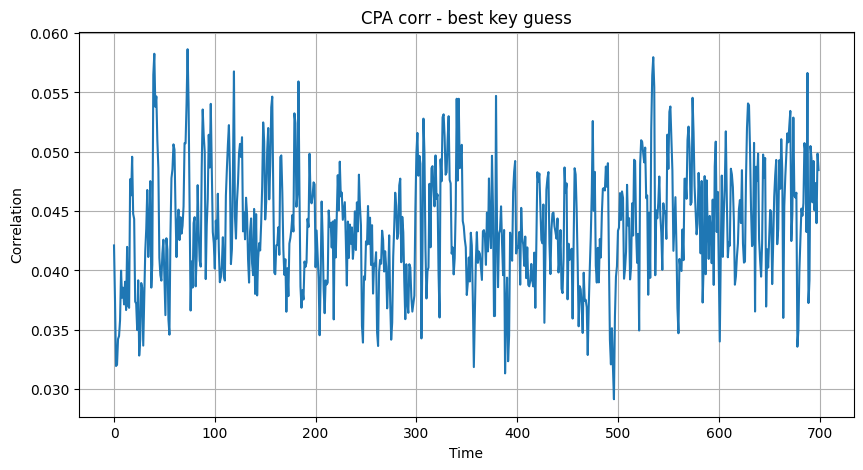

In [74]:
plt.figure(figsize=(10,5))
plt.plot(np.max(guesses, axis=0))
plt.title("CPA corr - best key guess")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.grid()
plt.show()

In [33]:
metadata[0]

np.void(([  6,  65, 195,  66,  25, 182, 248,  19, 159, 132,  97,   6,  46, 137,  42,  16], [ 95,  75, 255, 146, 229,  35,  24,  50,  16, 107, 238,  33,  93,  56, 106, 178], [ 77, 251, 224, 242, 114,  33, 254,  16, 167, 141,  74, 220, 142,  73,   4, 105], [  7,  84,  71, 171, 129, 171,  90, 193, 236, 131,  21, 112, 185,  95, 212,  55], [0]), dtype=[('plaintext', 'u1', (16,)), ('ciphertext', 'u1', (16,)), ('key', 'u1', (16,)), ('masks', 'u1', (16,)), ('desync', '<u4', (1,))])